# Random Forest Best Model


In [1]:
# basic libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# helper
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Define Scoring

In [2]:
def r_square(y, y_pred):
    """ r^2 value defined by the competition host, r^2 = 1 indicates 100% prediction accuracy
    """
    avx = np.mean(y)
    avy = np.mean(y_pred)
    sum1, sumx, sumy = 0, 0, 0
    for i in range(len(y)):
        sum1 += (y[i] - avx)*(y_pred[i] - avy)
        sumx += (y[i] - avx)*(y[i] - avx)
        sumy += (y_pred[i] - avy)*(y_pred[i] - avy)
    return sum1*sum1/(sumx*sumy)

In [9]:
def mean_ape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [4]:
def mean_absolute_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)))

In [5]:
# make scorer
R_2 = make_scorer(r_square)
mape = make_scorer(mean_ape)
mae = make_scorer(mean_absolute_error)

## Baseline model performance

In [38]:
# 450-feature dataset
train_1 = pd.read_csv('~/Merck/Data/ACT1_train_450.csv', dtype={"MOLECULE": object, "Act": float})
test_1 = pd.read_csv('~/Merck/Data/ACT1_test_450.csv', dtype={"MOLECULE": object, "Act": float})

In [39]:
Y_train = train_1['Act'].values
train_1 = train_1.drop(['Act', 'Unnamed: 0'], axis = 1)
X_train = train_1.values

Y_test = test_1['Act'].values
test_1 = test_1.drop(['Act', 'Unnamed: 0'], axis = 1)
X_test = test_1.values

In [40]:
Y_train = np.reshape(Y_train,(len(Y_train),1))
Y_test = np.reshape(Y_test,(len(Y_test),1))
#clean up y
Y_train = np.ravel(Y_train)
Y_test = np.ravel(Y_test)
print(np.shape(Y_train), np.shape(X_train), np.shape(Y_test), np.shape(X_test))

(29792,) (29792, 441) (7449,) (7449, 441)


In [41]:
model = RandomForestRegressor(n_estimators=500, bootstrap = True, max_features = 'sqrt', n_jobs = -1)

In [42]:
print(model.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>


In [43]:
# cross validation
r2_scores = cross_val_score(model, X_train, Y_train, cv = 5, scoring = R_2)
print('The average R2 score:', r2_scores.mean())
mape_scores = cross_val_score(model, X_train, Y_train, cv = 5, scoring = mape)
print('The average MAPE score:', mape_scores.mean())
mae_scores = cross_val_score(model, X_train, Y_train, cv = 5, scoring = mae)
print('The average MAE score:', mae_scores.mean())

The average R2 score: 0.6625262011654869
The average MAPE score: 5.381124530472821
The average MAE score: 0.2654920223991083


In [44]:
# test on the test set
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [45]:
y_pred = np.reshape(y_pred, (len(y_pred), 1))
Y_test = np.reshape(Y_test,(len(Y_test),1))
print(y_pred.shape)
print(Y_test.shape)
r2_score_test = r_square(Y_test, y_pred)
print('The average R2 score:', r2_score_test.mean())
mape_score_test = mean_ape(Y_test, y_pred)
print('The average MAPE score:', mape_score_test.mean())
mae_score_test = mean_absolute_error(Y_test, y_pred)
print('The average MAE score:', mae_score_test.mean())

(7449, 1)
(7449, 1)
The average R2 score: 0.10712757151642263
The average MAPE score: 11.176256530535035
The average MAE score: 0.5321350978765671


(7449, 1)


Text(0.5, 1.0, 'APE Histogram 450 Features')

/home/xinxinmo/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


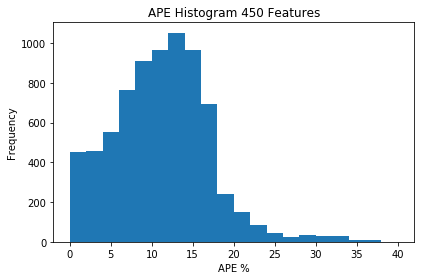

In [46]:
comparison = np.abs((y_pred-Y_test)/Y_test*100)
print(comparison.shape)
abs_comparison = np.abs(comparison)
mask = np.where(abs_comparison>0)
fig, ax= plt.subplots(1, 1,tight_layout=True)
ax.hist(comparison,np.linspace(0,40,21))
ax.set_xlabel('APE %')
ax.set_ylabel('Frequency')
ax.set_title('APE Histogram 450 Features')
#ax.text(30, 3000)

However, it's clear that this model is overfitting.

## Tuned model scores

In [ ]:
# import results
# 450 features 
hy_450_100 = pd.read_csv('../Results/RandomSearch_Tuning_450_3scores.csv')
# 50 features selected by correlation matrix
hy_50_corr_100 = pd.read_csv('../Results/RandomSearch_Tuning_50_corr_red_RF_iter100_3scores.csv')
# 50 features selected by Anova method
hy_50_Anova_100 = pd.read_csv('../Results/RandomSearch_Tuning_50_Anova_RF_iter100_3scores.csv')

In [ ]:
hy_450_100.head(5)

In [ ]:
# find best scores for different measuring metric and different features
best_r2_hyp_450 = hy_450_100.iloc[hy_450_100['r2_score'].idxmax()].copy()
best_r2_hyp_50_corr = hy_50_corr_100.iloc[hy_50_corr_100['r2_score'].idxmax()].copy()
best_r2_hyp_Anova = hy_50_Anova_100.iloc[hy_50_Anova_100['r2_score'].idxmax()].copy()

print("Best R2 score for 450-feature dataset is: %10.5f" % (best_r2_hyp_450['r2_score']))
print("Corresponding parameters are:", best_r2_hyp_450['hyperparameters'])
print("Best R2 score for 50-feature (corr) dataset is: %10.5f" % (best_r2_hyp_50_corr['r2_score']))
print("Corresponding parameteres are:", best_r2_hyp_50_corr['hyperparameters'])
print("Best R2 score for 50-feature (Anova) dataset is: %10.5f" % (best_r2_hyp_Anova['r2_score']))
print("Corresponding parameteres are:", best_r2_hyp_Anova['hyperparameters'])

best_mape_hyp_450 = hy_450_100.iloc[hy_450_100['mape_score'].idxmin()].copy()
best_mape_hyp_50_corr = hy_50_corr_100.iloc[hy_50_corr_100['mape_score'].idxmin()].copy()
best_mape_hyp_Anova = hy_50_Anova_100.iloc[hy_50_Anova_100['mape_score'].idxmin()].copy()

print()
print("Best MAPE score for 450-feature dataset is: %10.5f" % (best_r2_hyp_450['mape_score']))
print("Corresponding parameteres are:", best_mape_hyp_450['hyperparameters'])
print("Best MAPE score for 50-feature (corr) dataset is: %10.5f" % (best_r2_hyp_50_corr['mape_score']))
print("Corresponding parameteres are:", best_mape_hyp_50_corr['hyperparameters'])
print("Best MAPE score for 50-feature (Anova) dataset is: %10.5f" % (best_r2_hyp_Anova['mape_score']))
print("Corresponding parameteres are:", best_mape_hyp_Anova['hyperparameters'])

best_mae_hyp_450 = hy_450_100.iloc[hy_450_100['mae_score'].idxmin()].copy()
best_mae_hyp_50_corr = hy_50_corr_100.iloc[hy_50_corr_100['mae_score'].idxmin()].copy()
best_mae_hyp_Anova = hy_50_Anova_100.iloc[hy_50_Anova_100['mae_score'].idxmin()].copy()

print()
print("Best MAE score for 450-feature dataset is: %10.5f" % (best_r2_hyp_450['mae_score']))
print("Corresponding parameteres are:", best_mae_hyp_450['hyperparameters'])
print("Best MAE score for 50-feature (corr) dataset is: %10.5f" % (best_r2_hyp_50_corr['mae_score']))
print("Corresponding parameteres are:", best_mae_hyp_50_corr['hyperparameters'])
print("Best MAE score for 50-feature (Anova) dataset is: %10.5f" % (best_r2_hyp_Anova['mae_score']))
print("Corresponding parameteres are:", best_mae_hyp_Anova['hyperparameters'])

## Result comparation

From the results above, we can know that:

```
1) For the 450-feature dataset, the baseline model performed better.
2) For the 50-feature-ARONA dataset, the baseline model performed better.
3) For the 50-feature dataset, the tuned model performed better.
```

Thus, we can keep the baseline model for 450-feature and 50-feature-ARONA dataset as the best model. However, we need to use the tuned parameters to train a new model for 50-feature dataset.

In [6]:
train_2 = pd.read_csv('~/Merck/Data/ACT1_Anova_50.csv', dtype={"MOLECULE": object, "Act": float})
y_2 = train_2['Act'].values
train_2 = train_2.drop(['Act', 'Unnamed: 0'], axis = 1)
x_2 = train_2.values
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(x_2, y_2, train_size = 0.80, random_state = 0)

In [7]:
print(np.shape(Y_train_2), np.shape(X_train_2), np.shape(Y_test_2), np.shape(X_test_2))
Y_train_2 = np.reshape(Y_train_2,(len(Y_train_2),1))
Y_test_2 = np.reshape(Y_test_2,(len(Y_test_2),1))
Y_test_2 = np.ravel(Y_test_2)
Y_train_2 = np.ravel(Y_train_2)

(29792,) (29792, 50) (7449,) (7449, 50)


In [10]:
"""
Best MAPE score for 50-feature (corr) dataset is:    5.57787
{'bootstrap': False, 'max_depth': 27, 'max_features': 'log2', 'min_samples_split': 5, 'min_samples_leaf': 2, 'n_estimators': 360}
"""
#cross validation
#best_model = RandomForestRegressor(bootstrap = False, max_depth = 27, max_features = 'log2', min_samples_split = 5, min_samples_leaf = 2, n_estimators=360, n_jobs = -1)
best_model = RandomForestRegressor(n_estimators=500, n_jobs = -1)
tuned_r2_scores = cross_val_score(best_model, X_train_2, Y_train_2, cv = 5, scoring = R_2)
print('The average R2 score:', tuned_r2_scores.mean())
tuned_mape_scores = cross_val_score(best_model, X_train_2, Y_train_2, cv = 5, scoring = mape)
print('The average MAPE score:', tuned_mape_scores.mean())
tuned_mae_scores = cross_val_score(best_model, X_train_2, Y_train_2, cv = 5, scoring = mae)
print('The average MAE score:', tuned_mae_scores.mean())

The average R2 score: 0.5664568847488061
The average MAPE score: 5.8785563744915725
The average MAE score: 0.2890393889306732


In [11]:
# test on the test set
best_model.fit(X_train_2, Y_train_2)
y_pred_2 = best_model.predict(X_test_2)

In [12]:
print(best_model.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>


In [28]:
y_pred_2 = np.reshape(y_pred_2, (len(y_pred_2), 1))
Y_test_2 = np.reshape(Y_test_2,(len(Y_test_2),1))
print(y_pred_2.shape)
print(Y_test_2.shape)
print("For the test set")
r2_score_test_2 = r_square(Y_test_2, y_pred_2)
print('The average R2 score:', r2_score_test_2.mean())
mape_score_test_2 = mean_ape(Y_test_2, y_pred_2)
print('The average MAPE score:', mape_score_test_2.mean())
mae_score_test_2 = mean_absolute_error(Y_test_2, y_pred_2)
print('The average MAE score:', mae_score_test_2.mean())

(7449, 1)
(7449, 1)
For the test set
The average R2 score: 0.5950179087519669
The average MAPE score: 5.6987174517445105
The average MAE score: 0.27980563133308145


Text(0.5, 1.0, 'APE Histogram 50 Features')

/home/xinxinmo/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


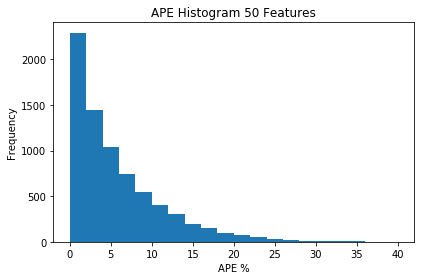

In [17]:
comparison = np.abs((y_pred_2-Y_test_2)/Y_test_2*100)
abs_comparison = np.abs(comparison)
mask = np.where(abs_comparison>0)
fig, ax= plt.subplots(1, 1,tight_layout=True)
ax.hist(comparison,np.linspace(0,40,21))
ax.set_xlabel('APE %')
ax.set_ylabel('Frequency')
ax.set_title('APE Histogram 50 Features')
#ax.text(30, 3000)

In [29]:
# 50 features
train_3 = pd.read_csv('~/Merck/Data/ACT1_train_50_corr_red.csv', dtype={"MOLECULE": object, "Act": float})
y_3 = train_3['Act'].values
train_3 = train_3.drop(['Act', 'Unnamed: 0'], axis = 1)
x_3 = train_3.values
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(x_3, y_3, train_size = 0.80, random_state = 0)

In [30]:
print(np.shape(Y_train_3), np.shape(X_train_3), np.shape(Y_test_3), np.shape(X_test_3))
Y_train_3 = np.reshape(Y_train_3,(len(Y_train_3),1))
Y_test_3 = np.reshape(Y_test_3,(len(Y_test_3),1))
Y_test_3 = np.ravel(Y_test_3)
Y_train_3 = np.ravel(Y_train_3)

(29792,) (29792, 49) (7449,) (7449, 49)


In [31]:
"""
Best MAPE score for 50-feature (corr) dataset is:    5.57787
{'bootstrap': False, 'max_depth': 27, 'max_features': 'log2', 'min_samples_split': 5, 'min_samples_leaf': 2, 'n_estimators': 360}
"""
#cross validation
best_model_corr = RandomForestRegressor(bootstrap = False, max_depth = 27, max_features = 'log2', min_samples_split = 5, min_samples_leaf = 2, n_estimators=360, n_jobs = -1)
#best_model_corr = RandomForestRegressor(n_estimators=500, n_jobs = -1)
tuned_r2_scores = cross_val_score(best_model_corr, X_train_3, Y_train_3, cv = 5, scoring = R_2)
print('The average R2 score:', tuned_r2_scores.mean())
tuned_mape_scores = cross_val_score(best_model, X_train_3, Y_train_3, cv = 5, scoring = mape)
print('The average MAPE score:', tuned_mape_scores.mean())
tuned_mae_scores = cross_val_score(best_model, X_train_3, Y_train_3, cv = 5, scoring = mae)
print('The average MAE score:', tuned_mae_scores.mean())

The average R2 score: 0.6134209035741749
The average MAPE score: 5.647620645586544
The average MAE score: 0.27723574412703555


In [35]:
# test on the test set
best_model_corr.fit(X_train_3, Y_train_3)
y_pred_3 = best_model_corr.predict(X_test_3)
print(best_model_corr.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=27,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=360, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>


In [36]:
y_pred_3 = np.reshape(y_pred_3, (len(y_pred_3), 1))
Y_test_3 = np.reshape(Y_test_3,(len(Y_test_3),1))
print(y_pred_3.shape)
print(Y_test_3.shape)
print("For the test set")
r2_score_test_3 = r_square(Y_test_3, y_pred_3)
print('The average R2 score:', r2_score_test_3.mean())
mape_score_test_3 = mean_ape(Y_test_3, y_pred_3)
print('The average MAPE score:', mape_score_test_2.mean())
mae_score_test_3 = mean_absolute_error(Y_test_3, y_pred_3)
print('The average MAE score:', mae_score_test_3.mean())

(7449, 1)
(7449, 1)
For the test set
The average R2 score: 0.6306572799403607
The average MAPE score: 5.6987174517445105
The average MAE score: 0.27023623613216613


Text(0.5, 1.0, 'APE Histogram 50 Features')

/home/xinxinmo/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


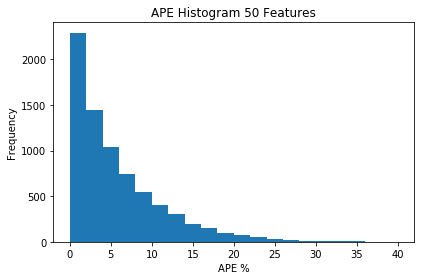

In [37]:
comparison = np.abs((y_pred_2-Y_test_2)/Y_test_2*100)
abs_comparison = np.abs(comparison)
mask = np.where(abs_comparison>0)
fig, ax= plt.subplots(1, 1,tight_layout=True)
ax.hist(comparison,np.linspace(0,40,21))
ax.set_xlabel('APE %')
ax.set_ylabel('Frequency')
ax.set_title('APE Histogram 50 Features')
#ax.text(30, 3000)